# Chapter 15: Linear Regression and Model Fit

### For graph 1

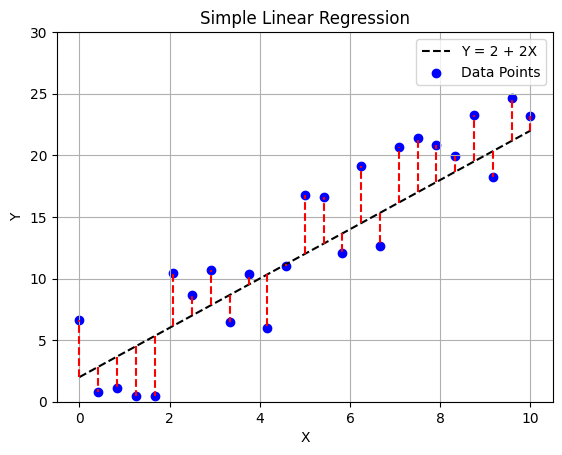

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate 25 random x values
x = np.linspace(0, 10, 25)

# Create a base y=x line and add some noise to create scattered points
y_base = 2*x +2
noise = np.random.uniform(-5, 5, size=len(x))
y_scatter = y_base + noise

# Plot the main dashed line (y = x)
plt.plot(x, y_base, 'k--', label="Y = 2 + 2X")

# Scatter plot the noisy data points
plt.scatter(x, y_scatter, color='blue', label="Data Points")

# Draw vertical dashed lines from each point to the main line
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_base[i], y_scatter[i]], 'r--')

# Labels and title
plt.ylim(0,30)
plt.grid(True)

# Plot the data and the regression line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


### For Graph 2

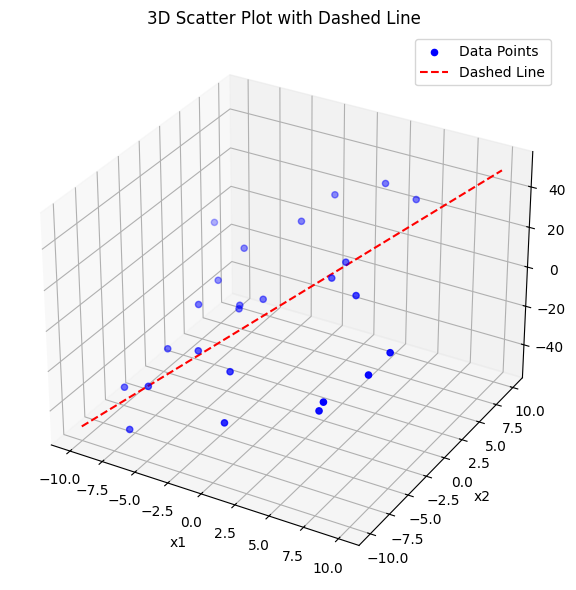

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for x1, x2
np.random.seed(42)
x1 = np.random.uniform(-10, 10, 25)
x2 = np.random.uniform(-10, 10, 25)
y = 2 * x1 + 3 * x2 + np.random.normal(0, 5, 25)  # Linear function with noise

# Create 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(x1, x2, y, color='b', label='Data Points')

# Define points for the dashed line
x1_line = np.linspace(-10, 10, 10)
x2_line = np.linspace(-10, 10, 10)
y_line = 2 * x1_line + 3 * x2_line  # Linear relationship
ax.plot(x1_line, x2_line, y_line, 'r--', label='Dashed Line')

# Labels and title
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("3D Scatter Plot with Dashed Line")
ax.legend()
plt.tight_layout()
plt.show()



### Simple linear regression

Intercept: -6.862406015037564
Slope: 0.37879699248120285
Mean Squared Error: 29.973796992481205
R-squared: 0.7991671753799481


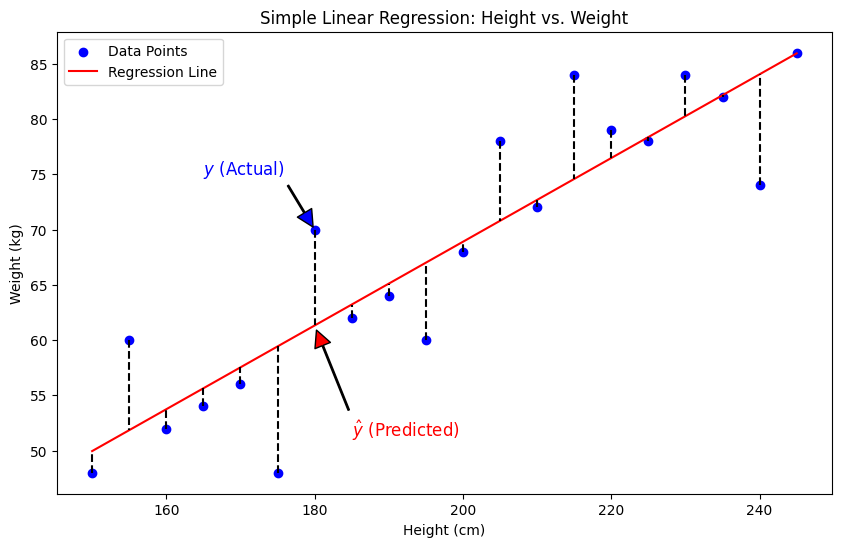

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
data = {
    'Height': [150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
               200, 205, 210, 215, 220, 225, 230, 235, 240, 245],           
    'Weight': [48, 60, 52, 54, 56, 48, 70, 62, 64, 60,
               68, 78, 72, 84, 79, 78, 84, 82, 74, 86]
}

# Create DataFrame
df = pd.DataFrame(data)

# Reshape data for sklearn (X needs to be 2D)
X = df['Height'].values.reshape(-1, 1)
y = df['Weight']

# Create a linear regression model and fit it
model = LinearRegression()
model.fit(X, y)

# Get model parameters
intercept = model.intercept_
slope = model.coef_[0]

# Make predictions
y_pred = model.predict(X)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y, y_pred)
r_squared = model.score(X, y)

# Print results
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add dashed vertical lines from data points to regression line (residuals)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], 'k--')

# Choose a representative data point for annotation (e.g., index 3)
idx = 6  # Corresponds to Height=165 cm
x_val = X[idx][0]
actual_y = y[idx]
predicted_y = y_pred[idx]

# Annotate the actual value y
plt.annotate(r'$y$ (Actual)',
             xy=(x_val, actual_y),
             xytext=(x_val - 15, actual_y + 5),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1),
             fontsize=12,
             color='blue')

# Annotate the predicted value y_hat
plt.annotate(r'$\hat{y}$ (Predicted)',
             xy=(x_val, predicted_y),
             xytext=(x_val + 5, predicted_y - 10),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1),
             fontsize=12,
             color='red')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Simple Linear Regression: Height vs. Weight')
plt.legend()
plt.show()


## Parameter hypothesis

### Homoscedasticity

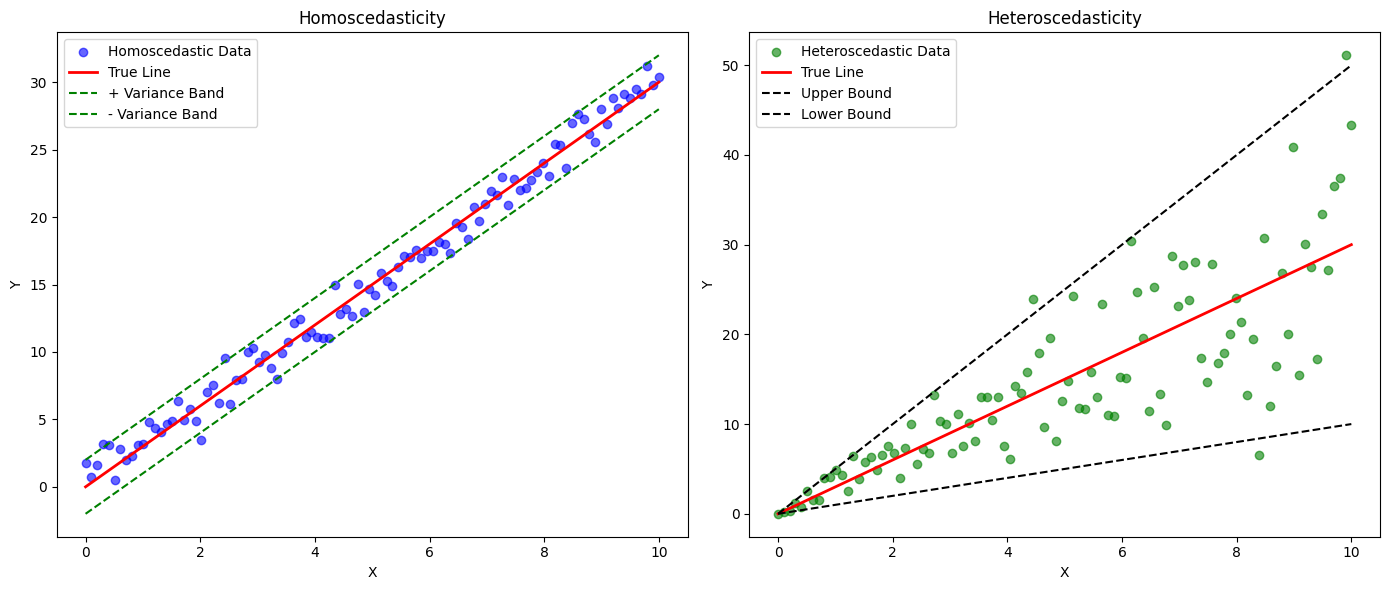

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(0)

# Generate sample data for homoscedasticity
X_homo = np.linspace(0, 10, 100)
y_homo = 3*X_homo + np.random.normal(0, 1, 100)  # constant variance in residuals

# Generate sample data for heteroscedasticity
X_hetero = np.linspace(0, 10, 100)
y_hetero = 3*X_hetero + np.random.normal(0, X_hetero, 100)  # increasing variance in residuals

# Plotting Homoscedasticity
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_homo, y_homo, color='blue', alpha=0.6, label="Homoscedastic Data")
plt.plot(X_homo, 3*X_homo, color='red', label="True Line", linewidth=2)


# Shift value to draw lines above and below
shift = 2

# Plot dashed lines parallel to regression line
plt.plot(X_homo, 3 * X_homo + shift, color='green', linestyle='--', label="+ Variance Band")
plt.plot(X_homo, 3 * X_homo - shift, color='green', linestyle='--', label="- Variance Band")

plt.title("Homoscedasticity")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Plotting Heteroscedasticity
plt.subplot(1, 2, 2)
plt.scatter(X_hetero, y_hetero, color='green', alpha=0.6, label="Heteroscedastic Data")
plt.plot(X_hetero, 3*X_hetero, color='red', label="True Line", linewidth=2)

# Define slightly different slopes to show increasing spread
upper_slope = 5
lower_slope = 1
intercept = 0

# Plot diverging dashed lines (representing increasing variance)
plt.plot(X_hetero, upper_slope * X_hetero + intercept, color='black', linestyle='--', label="Upper Bound")
plt.plot(X_hetero, lower_slope * X_hetero + intercept, color='black', linestyle='--', label="Lower Bound")


plt.title("Heteroscedasticity")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()


### Example: Multiple Linear Regression

In [5]:
#!pip install statsmodels

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# Generating synthetic data
np.random.seed(42)

# Simulating data for house prices
n = 200
sqft = np.random.randint(800, 4000, size=n)  # Square footage of the house
bedrooms = np.random.randint(1, 6, size=n)  # Number of bedrooms
age = np.random.randint(0, 100, size=n)  # Age of the house

# Generating sale price with some noise
price = (sqft * 200) + (bedrooms * 10000) - (age * 100) + np.random.normal(0, 50000, size=n)

# Create a DataFrame
data = pd.DataFrame({'sqft': sqft, 'bedrooms': bedrooms, 'age': age, 'price': price})

# Split the data into training and test sets
X = data[['sqft', 'bedrooms', 'age']]  # Features
y = data['price']  # Target variable (price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the regression summary, which includes p-values
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              6601.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                   6.57e-165
Time:                        22:55:30   Log-Likelihood:                         -1955.8
No. Observations:                 160   AIC:                                      3918.
Df Residuals:                     157   BIC:                                      3927.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/var/folders/b8/hq7p21n142n321y966q8j1600000gn/T/ipykernel_7020/3050515756.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


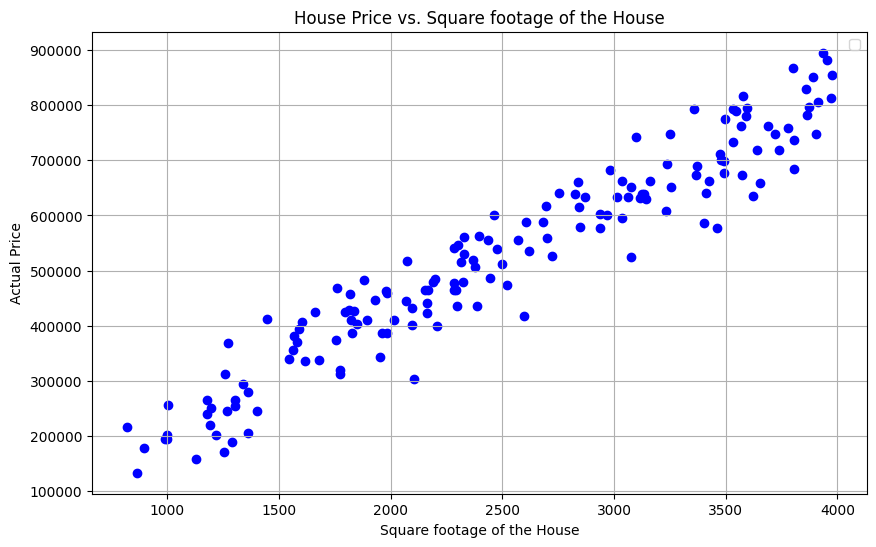

In [7]:
# Visualize the results
plt.figure(figsize=(10,6))

# Plotting actual vs predicted prices
plt.scatter( X_train['sqft'], y_train, color='blue')
plt.title('House Price vs. Square footage of the House')
plt.ylabel('Actual Price')
plt.xlabel('Square footage of the House')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/b8/hq7p21n142n321y966q8j1600000gn/T/ipykernel_7020/839222664.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


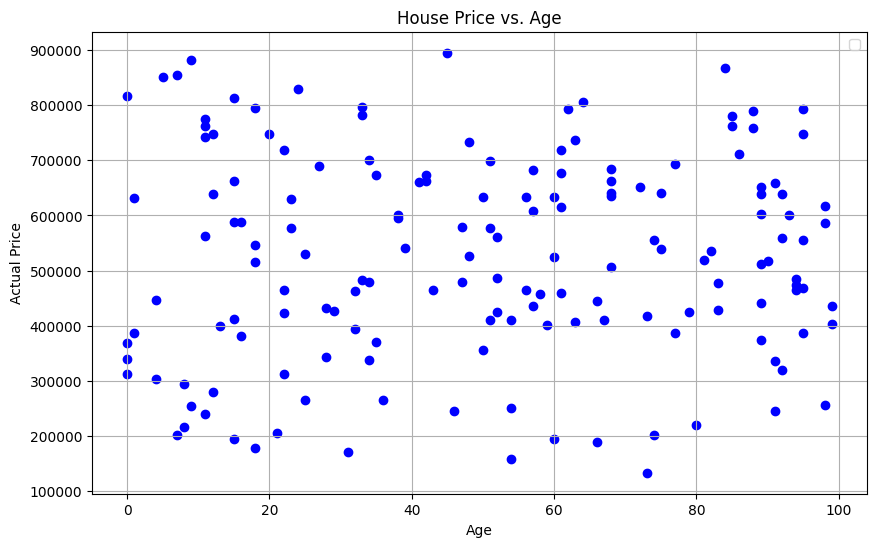

In [8]:
# Visualize the results
plt.figure(figsize=(10,6))

# Plotting actual vs predicted prices
plt.scatter( X_train['age'], y_train, color='blue')
plt.title('House Price vs. Age')
plt.ylabel('Actual Price')
plt.xlabel('Age')
plt.legend()
plt.grid(True)
plt.show()

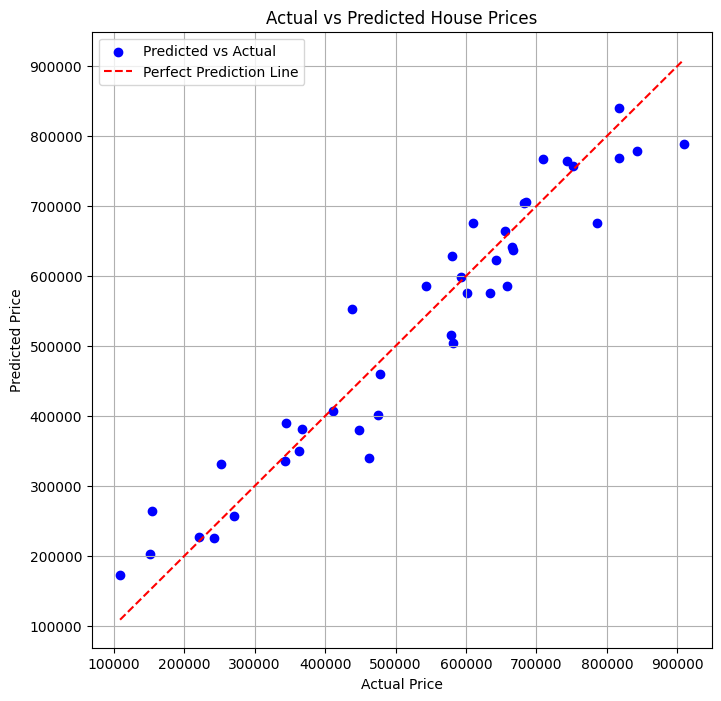

In [9]:
# Predict the prices on the test set
y_pred = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(8,8))

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

### Residual analysis

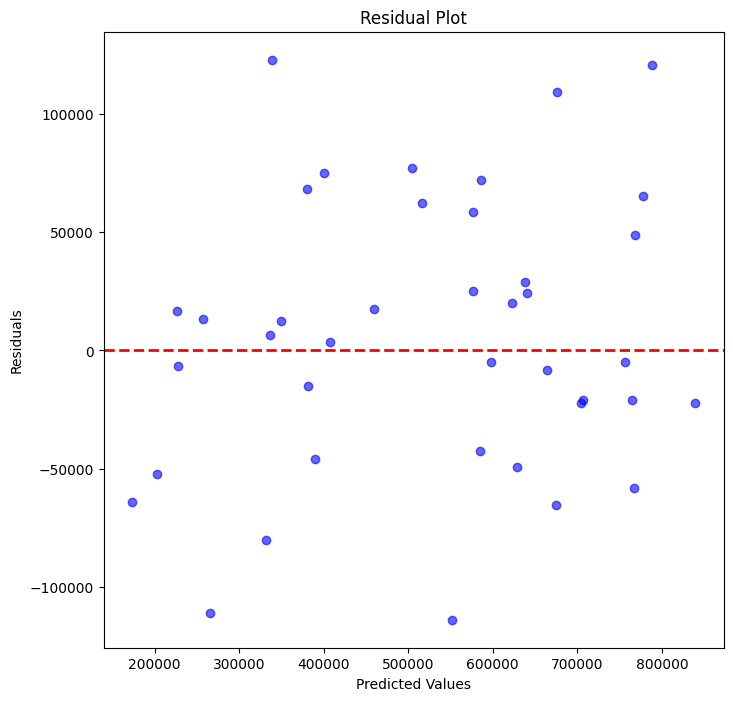

In [10]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### Q-Q plot

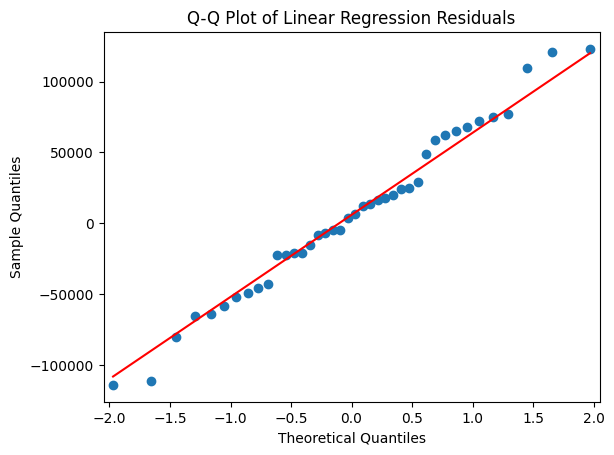

In [11]:
  # Generate Q-Q plot of the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Linear Regression Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

## Kurtosis

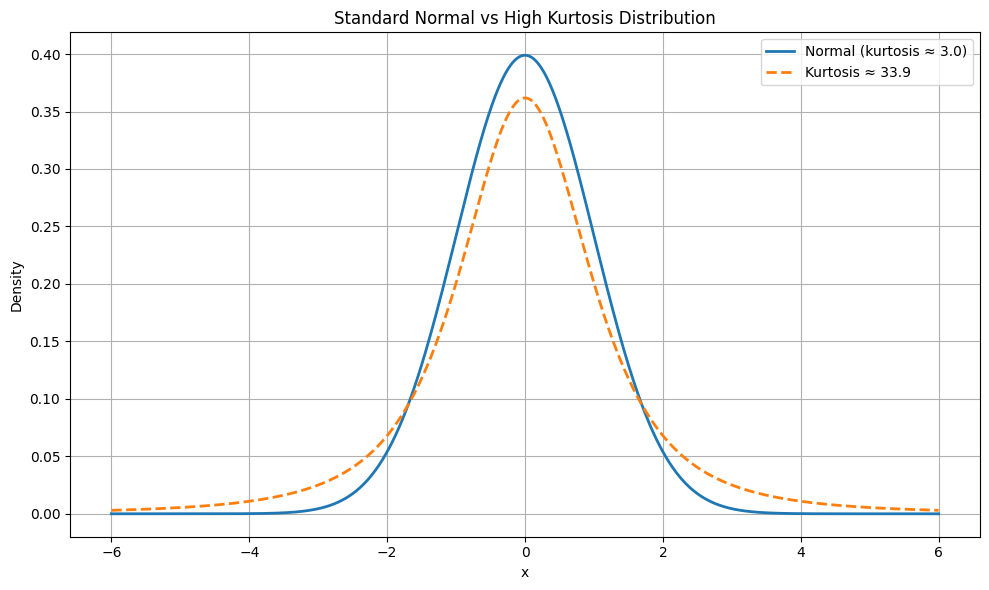

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, kurtosis

# Create x-axis values
x = np.linspace(-6, 6, 1000)

# Standard normal distribution (kurtosis ≈ 3)
normal_pdf = norm.pdf(x)

# t-distribution with df=2.5 (heavy-tailed, kurtosis ≈ 10)
df = 2.5
t_dist = t(df=df)
t_pdf = t_dist.pdf(x)

# Sample from both to compute empirical kurtosis
np.random.seed(0)
normal_sample = np.random.normal(loc=0, scale=1, size=10000)
t_sample = t.rvs(df=df, size=10000)

# Calculate kurtosis (Fisher=False gives Pearson kurtosis: normal = 3)
k_normal = 3
k_t = kurtosis(t_sample, fisher=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, normal_pdf, label=f'Normal (kurtosis ≈ {k_normal:.1f})', linewidth=2)
plt.plot(x, t_pdf, label=f'Kurtosis ≈ {k_t:.1f}', linestyle='--', linewidth=2)

plt.title("Standard Normal vs High Kurtosis Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
